# Language Models with Hugging Face Exercise (5 points)



# 1. Hugging Face Pipelines

Apply the Hugging Face Pipelines API to 3 tasks of your choice. 

For each task, use the created model to make predictions to at least 2 text sequences of your choice.

In [5]:
# Your Code Here
from transformers import pipeline
model1 = pipeline('sentiment-analysis')
print("sentiment analysis result")
print(model1(['Haha, today is a nice day!','I hate the weather today']))

model2 = pipeline('summarization')
print(model2('In discussing the growth of cities in the United States in the nineteenth century, one cannot really use the term “urban planning,” as it suggests modern concerns for spatial and service organization which, in most instances, did not exist before the planning revolution called the City Beautiful Movement that began in the 1890s. While there certainly were urban areas that were “planned” in the comprehensive contemporary sense of the word before that date, most notably Washington, D.C., these were the exception. Most “planned” in the nineteenth century was limited to areas much smaller than a city and was closely associated with developers trying to make a profit from a piece of land. Even when these small-scale plans were well designed, the developers made only those improvements that were absolutely necessary to attract the wealthy segment of the market. Indeed, it was the absence of true urban planning that allowed other factors to play such an important role in shaping the nineteenth-century American city.'))
print(model2('Many nineteenth-century urban problems were those that continue to plague cities today—crime, pollution, noise—but others were the direct result of lack of planning and regulation, such as threat of fire, poor sanitation, and shoddy building construction. Fire was a significant problem in urban areas of North America from the time of the first European settlement. Construction with combustible materials coupled with close placement of buildings and the use of open flames in heating, cooking, and lighting meant that the potential for raging fires was ever present. Lack of sanitation, and the ensuring public health problems it created, was a more constant, if less dramatic, urban issue. It was not until the 1860s that any serious, concerted effort was made to develop proper systems for water delivery and sewage removal. In spite of remarkable strides made in the 1870s and 1880s by the newly established profession of sanitary engineering, the common nineteenth-century pattern of individual unprofessionally planned and installed cesspools (underground tanks for holding household sewage) continued. This led to water contamination and the spread of disease by rodents and insects.'))

model3 = pipeline('text-classification')
print('text-classification result:')
print(model3(['Haha, today is a nice day!','I hate the weather today']))


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


sentiment analysis result
[{'label': 'POSITIVE', 'score': 0.9998708963394165}, {'label': 'NEGATIVE', 'score': 0.9990667700767517}]
[{'summary_text': ' In discussing the growth of cities in the U.S. in the nineteenth century, one cannot really use the term “urban planning” as it suggests modern concerns for spatial and service organization which, in most instances, did not exist before the City Beautiful Movement that began in the 1890s .'}]


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Fire was a significant problem in urban areas of North America from the time of the first European settlement . Lack of sanitation, and the ensuring public health problems it created, was a more constant, if less dramatic, urban issue . It was not until the 1860s that any serious effort was made to develop proper systems for water delivery and sewage removal .'}]
text-classification result:
[{'label': 'POSITIVE', 'score': 0.9998708963394165}, {'label': 'NEGATIVE', 'score': 0.9990667700767517}]


# 2. Load the Dataset

We will use the TweetEval dataset from Hugging Face datasets. The dataset has several groups of tweet messages, and we will use the group `stance_climate`. The aim is to predict whether a tweet message is neutral, against, or in favor of climate change.

In [8]:
from datasets import load_dataset

data = load_dataset("tweet_eval", 'stance_climate')

Generating train split:   0%|          | 0/355 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/169 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/40 [00:00<?, ? examples/s]

Dataset tweet_eval downloaded and prepared to C:/Users/Xiaoyu.Zhang6/.cache/huggingface/datasets/tweet_eval/stance_climate/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Display the number of samples in the train, test, and validation datasets.

In [9]:
# Your Code Here
print("train nums:"+str(data['train'].num_rows))
print("test nums:"+str(data['test'].num_rows))
print("validation nums:"+str(data['validation'].num_rows))

train nums:355
test nums:169
validation nums:40


Display the categories of the sentences in the dataset.

In [10]:
# Your Code Here
print("categories of the sentences :"+str(data['train'].features['label'].names))

categories of the sentences :['none', 'against', 'favor']


Display the first 20 messages using Pandas dataframe.

In [11]:
# Your Code Here
import pandas as pd

messages=[str(x) for x in data.data['train'][0][:20]]
df=pd.DataFrame(columns=['messgaes'])
df['messages']=messages
df['messages']

0     Why Is The Pope Upset?  via @user #UnzippedTru...
1     We support Australia's Climate Roundtable whic...
2     It's nights like this when I'm not so fond of ...
3     #Republican party will go down in history book...
4     RT @user @user We need degrowth - stop destroy...
5     @user - #Wrong #century re the #IPCCreport & t...
6     Thanks #MarcLevine & #Ilike_Mike for supportin...
7     That awkward moment when a pro-coal PR campaig...
8     Attenborough: 'The real problem is global' i.e...
9     #Technology is a sign of how far we have come!...
10    @user I'm just happy he's telling the @user to...
11    Isn't CO2 impact on warming logarithmic, and a...
12         @user Those items need to come back.  #SemST
13    Try to create the world you want to live in. @...
14    @user wow that is certainly an extreme prognos...
15    RT @user 700 people dead in Pakistan due to he...
16    Audio world, look out! There's a new sheriff i...
17    @user @user i always said that Democrats w

Create a bar plot to inspect the distribution of the labels in the train dataset.

<AxesSubplot:>

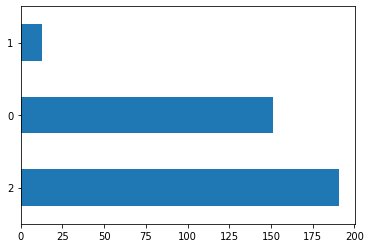

In [12]:
# Your Code Here
labels=[str(x) for x in data.data['train'][1]]
pd.Series(labels).value_counts().plot(kind="barh")

# 3. Tokenization

Apply the tokenizer from the `"distilbert-base-uncased"` model to the first 10 sentences in the train dataset, by setting `padding=True`. Display the sequences of word indices and the attention masks.

In [13]:
# Your Code Here
from transformers import AutoTokenizer
model_checkpoint="distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True,padding=True)
tokenizer(df['messages'].tolist())

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

C:\Users\Xiaoyu.Zhang6\AppData\Local\Continuum\anaconda3\envs\crash\lib\site-packages\huggingface_hub\file_download.py:125: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Xiaoyu.Zhang6\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [[101, 2339, 2003, 1996, 4831, 6314, 1029, 3081, 1030, 5310, 1001, 4895, 5831, 11469, 16344, 14317, 1001, 4831, 27843, 12273, 2483, 1001, 7367, 5244, 2102, 102], [101, 2057, 2490, 2660, 1005, 1055, 4785, 2461, 10880, 2029, 2003, 4346, 1037, 7705, 2005, 21082, 5981, 3805, 1997, 3000, 1030, 5310, 1001, 7367, 5244, 2102, 102], [101, 2009, 1005, 1055, 6385, 2066, 2023, 2043, 1045, 1005, 1049, 2025, 2061, 13545, 1997, 2026, 2146, 2606, 1012, 1045, 2074, 10587, 24494, 2009, 2035, 2125, 999, 1001, 3684, 16535, 1001, 1052, 2078, 27767, 4313, 2140, 1001, 7367, 5244, 2102, 102], [101, 1001, 3951, 2283, 2097, 2175, 2091, 1999, 2381, 2808, 2004, 2283, 2008, 2768, 1999, 1996, 2126, 1997, 1001, 5637, 15950, 2015, 1998, 6349, 2000, 7901, 1001, 7367, 5244, 2102, 102], [101, 19387, 1030, 5310, 1030, 5310, 2057, 2342, 2139, 26982, 1011, 2644, 9846, 2256, 4774, 1010, 17531, 1012, 1001, 7367, 5244, 2102, 102], [101, 1030, 5310, 1011, 1001, 3308, 1001, 2301, 2128, 1996, 1001, 12997, 9468, 289

Convert the tokenized sequences for the first and the second sentences to text, and compare them to the raw text sentences.

In [14]:
# Your Code Here
print("first sentence:")
print(df['messages'].tolist()[0])
print("first sentence to text:")
print(' '.join(tokenizer.convert_ids_to_tokens([101, 2339, 2003, 1996, 4831, 6314, 1029, 3081, 1030, 5310, 1001, 4895, 5831, 11469, 16344, 14317, 1001, 4831, 27843, 12273, 2483, 1001, 7367, 5244, 2102, 102])))
print("second sentence:")
print(df['messages'].tolist()[1])
print("second sentence to text:")
print(' '.join(tokenizer.convert_ids_to_tokens([101, 2009, 1005, 1055, 6385, 2066, 2023, 2043, 1045, 1005, 1049, 2025, 2061, 13545, 1997, 2026, 2146, 2606, 1012, 1045, 2074, 10587, 24494, 2009, 2035, 2125, 999, 1001, 3684, 16535, 1001, 1052, 2078, 27767, 4313, 2140, 1001, 7367, 5244, 2102, 102])))

first sentence:
Why Is The Pope Upset?  via @user #UnzippedTruth #PopeFrancis #SemST
first sentence to text:
[CLS] why is the pope upset ? via @ user # un ##zi ##pped ##tr ##uth # pope ##fra ##nc ##is # se ##ms ##t [SEP]
second sentence:
We support Australia's Climate Roundtable which is providing a framework for sensible debate ahead of Paris @user #SemST
second sentence to text:
[CLS] it ' s nights like this when i ' m not so fond of my long hair . i just wanna chop it all off ! # heat ##wave # p ##n ##wg ##ir ##l # se ##ms ##t [SEP]


# 4. Train a Model for Message Classification

Next, let's train a classifier by using a pretrained `"distilbert-base-uncased"` model and fine-tune it to the tweet messages. 

First, apply the tokenizer to the full train, test, and validation datasets.

In [15]:
# Your Code Here
train_messages=[str(x) for x in data.data['train'][0]]#355
validation_messages=[str(x) for x in data.data['validation'][0]]#40
test_messages=[str(x) for x in data.data['test'][0]]#169

total_messgages=train_messages+validation_messages+test_messages

total_messgages_token=tokenizer(total_messgages)

total_messgages_token

{'input_ids': [[101, 2339, 2003, 1996, 4831, 6314, 1029, 3081, 1030, 5310, 1001, 4895, 5831, 11469, 16344, 14317, 1001, 4831, 27843, 12273, 2483, 1001, 7367, 5244, 2102, 102], [101, 2057, 2490, 2660, 1005, 1055, 4785, 2461, 10880, 2029, 2003, 4346, 1037, 7705, 2005, 21082, 5981, 3805, 1997, 3000, 1030, 5310, 1001, 7367, 5244, 2102, 102], [101, 2009, 1005, 1055, 6385, 2066, 2023, 2043, 1045, 1005, 1049, 2025, 2061, 13545, 1997, 2026, 2146, 2606, 1012, 1045, 2074, 10587, 24494, 2009, 2035, 2125, 999, 1001, 3684, 16535, 1001, 1052, 2078, 27767, 4313, 2140, 1001, 7367, 5244, 2102, 102], [101, 1001, 3951, 2283, 2097, 2175, 2091, 1999, 2381, 2808, 2004, 2283, 2008, 2768, 1999, 1996, 2126, 1997, 1001, 5637, 15950, 2015, 1998, 6349, 2000, 7901, 1001, 7367, 5244, 2102, 102], [101, 19387, 1030, 5310, 1030, 5310, 2057, 2342, 2139, 26982, 1011, 2644, 9846, 2256, 4774, 1010, 17531, 1012, 1001, 7367, 5244, 2102, 102], [101, 1030, 5310, 1011, 1001, 3308, 1001, 2301, 2128, 1996, 1001, 12997, 9468, 289

Create batched train, test, and validation datasets using `data_collator` to convert the data into TensorFlow tensors, and use a batch size of 8.

In [16]:
# Your Code Here
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_data=data.map(preprocess_function,batched=True)

tf_train_set = tokenized_data["train"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)

tf_validation_set = tokenized_data["validation"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)

tf_test_set = tokenized_data["test"].to_tf_dataset(
    columns=["attention_mask", "input_ids", "label"],
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Define a new model named `model_1` by using a pretrained `"distilbert-base-uncased"`, and set the number of labels for the classification of the tweeter messages.

Afterward, train the model for 3 epochs to make sure that it runs without errors. The training should take between 2 and 10 minutes.

In [17]:
# Your Code Here
from transformers import TFAutoModelForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
batch_size = 8
num_epochs = 3
batches_per_epoch = len(tokenized_data["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
model_1 = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)
model_1.compile(optimizer=optimizer)
model_1.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3)

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/3
45/45 [==============================] - 79s 2s/step - loss: 0.8567 - val_loss: 0.7146
Epoch 2/3
45/45 [==============================] - 67s 1s/step - loss: 0.6296 - val_loss: 0.5418
Epoch 3/3
45/45 [==============================] - 67s 1s/step - loss: 0.4758 - val_loss: 0.5174


Evaluate the model on the test dataset.

### Select a Model

Create `model_2` and train it for longer than 3 epochs. Use callbacks or other hyperparameter tuning strategies. Expected result is accuracy greater than 80%.

In [18]:
# Your Code Here
earlystop_callback = tf.keras.callbacks.EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=5)
batch_size = 8
num_epochs = 50
batches_per_epoch = len(tokenized_data["train"]) // batch_size
total_train_steps = int(batches_per_epoch * num_epochs)
model_2 = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

optimizer, schedule = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=total_train_steps)
model_2.compile(optimizer=optimizer)
model_2.fit(x=tf_train_set, validation_data=tf_validation_set, epochs=3,callbacks=[earlystop_callback])

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_transform', 'vocab_projector', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_39', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Epoch 1/3
45/45 [==============================] - 74s 2s/step - loss: 0.8375 - val_loss: 0.6384
Epoch 2/3
45/45 [==============================] - 68s 2s/step - loss: 0.5563 - val_loss: 0.5463
Epoch 3/3
45/45 [==============================] - 66s 1s/step - loss: 0.3314 - val_loss: 0.4559


# 5. Predict on New Sentences

Let's apply the trained model to the following 3 sentences. First use the tokenizer to convert the text setnences to sequences of tokes. Print the output tokens and check if the output seems correct.

In [19]:
sample = ['Training this model produced 10 grams of CO2', 'The quick brown fox jumps over the lazy dog', 'Global warming is a lie']

In [20]:
# Your Code Here
output_tokens=tokenizer(sample)
output_tokens

{'input_ids': [[101, 2731, 2023, 2944, 2550, 2184, 20372, 1997, 2522, 2475, 102], [101, 1996, 4248, 2829, 4419, 14523, 2058, 1996, 13971, 3899, 102], [101, 3795, 12959, 2003, 1037, 4682, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}

Next, use the following lines to predict the class of the sentences.

In [32]:
import numpy as np
for input_id in output_tokens.input_ids:
    predictions = model_2.predict(input_id)["logits"]
    class_preds = np.argmax(predictions, axis=1)

    print('Predicted class:', class_preds)

Predicted class: [2]
Predicted class: [0]
Predicted class: [2]
